# CGMF Summary File Analyzer

<font size=4em color="darkblue">Austin Carter<sup>a,b</sup>, Patrick Talou<sup>a</sup>, Ionel Stetcu<sup>a</sup></font> <br />
<sup>a</sup>Los Alamos National Laboratory <br />
<sup>b</sup>University of Michigan<br />

<a href="mailto:austinlc@umich.edu">austinlc@umich.edu</a>

In [28]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Define summary file path and modify if necessary
summary_file_name = "Summary.txt"
summary_file_path = os.path.join(os.getcwd(),summary_file_name)

In [30]:
# get data from summary file

open_file = open(summary_file_path)
lines = open_file.readlines()
currentline = 6
filenames, nHist, TXE, TXEu, TKE, TKEu, J, Ju, nn, nnm2, nnm3, ng, ngm2, ngm3, En, Enu, Eg, Egu = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
while True:
    data = lines[currentline].split()
    filenames.append(data[0])
    nHist.append(data[1])
    TXE.append(data[2])
    TXEu.append(data[3])
    TKE.append(data[4])
    TKEu.append(data[5])
    J.append(data[6])
    Ju.append(data[7])
    nn.append(data[8])
    nnm2.append(data[9])
    nnm3.append(data[10])
    ng.append(data[11])
    ngm2.append(data[12])
    ngm3.append(data[13])
    En.append(data[14])
    Enu.append(data[15])
    Eg.append(data[16])
    Egu.append(data[17])
    currentline += 1
    if currentline == len(lines):
        break

In [48]:
def plot_and_report(x_vars, y_vars, x_labels, y_labels):
    fig = plt.figure(figsize=(18,18))
    for i in range(len(y_vars)):  #rows
        for j in range(len(x_vars)):   #columns
            plt.subplot(len(y_vars),len(x_vars),i+j+1)
            plt.plot(x_vars[j],y_vars[i] , 'o')
            #bottom row, add xlabels
            if i == len(y_vars) - 1:
                plt.xlabel(x_labels[j])
            
            #left column, add ylabels
            if j == 0:
                plt.ylabel(y_labels[i])

In [61]:
print(type(TKE))
x = np.array(TKE,TKEu)
print(x)

<class 'list'>


TypeError: data type not understood

[[ 0.00014618 -0.00087864]
 [-0.00087864  0.0102582 ]]
[[ 1.         -0.71750805]
 [-0.71750805  1.        ]]
0.0102581974206


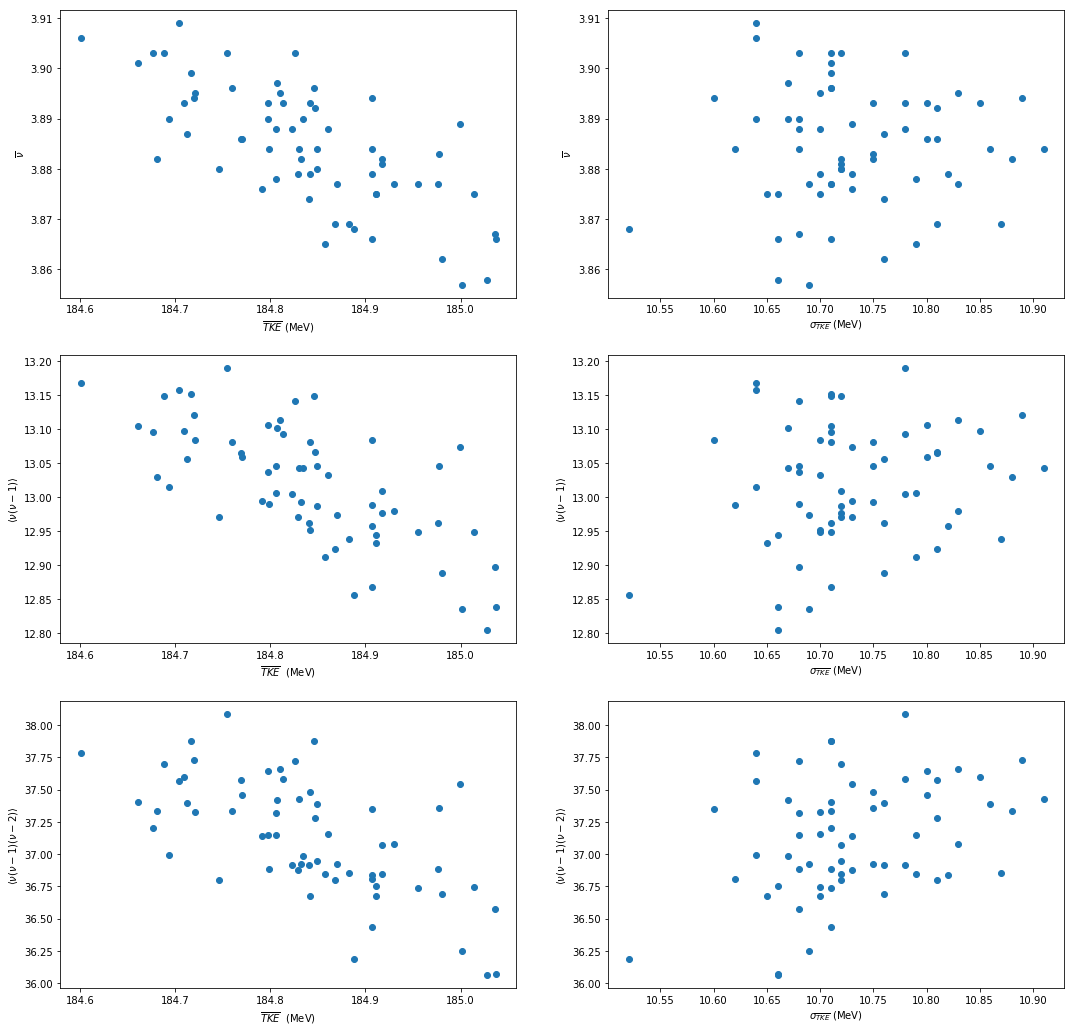

In [45]:
# Plot nn vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TKE, nn, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TKEu, nn, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TKE, nnm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TKEu, nnm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TKE, nnm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TKEu, nnm3, 'o')

print(np.cov(np.array(nn).astype(float),np.array(TKE).astype(float)))
print(np.corrcoef(np.array(nn).astype(float),np.array(TKE).astype(float)))
print(variance(np.array(TKE).astype(float)))

In [ ]:
print("Correlation Coefficients")


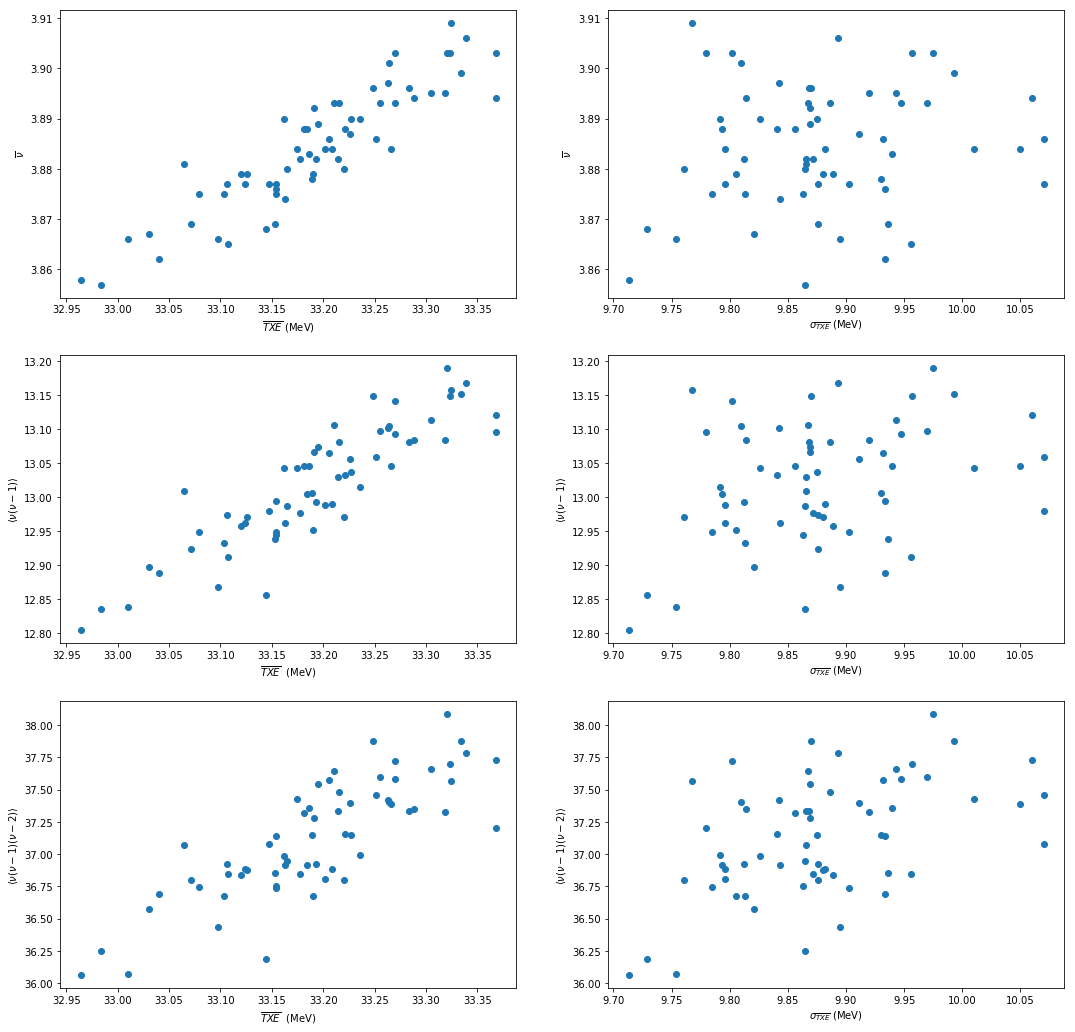

In [32]:
# Plot nn vs txe and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TXE}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TXE, nn, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\overline{\nu}$') 
plt.plot(TXEu, nn, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TXE, nnm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(TXEu, nnm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TXE, nnm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(TXEu, nnm3, 'o')

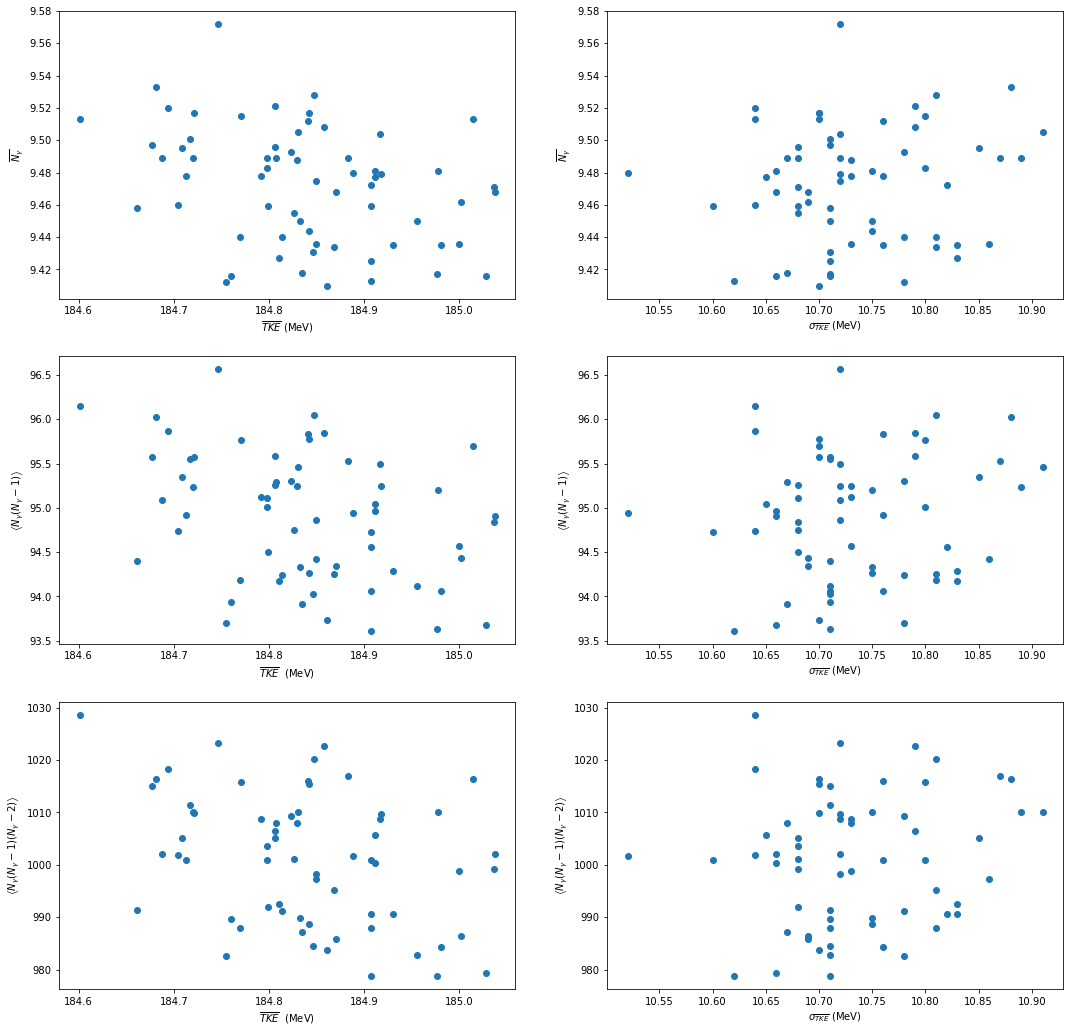

In [33]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TKE}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TKE, ng, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TKEu, ng, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TKE, ngm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TKEu, ngm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TKE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TKE, ngm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TKE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TKEu, ngm3, 'o')

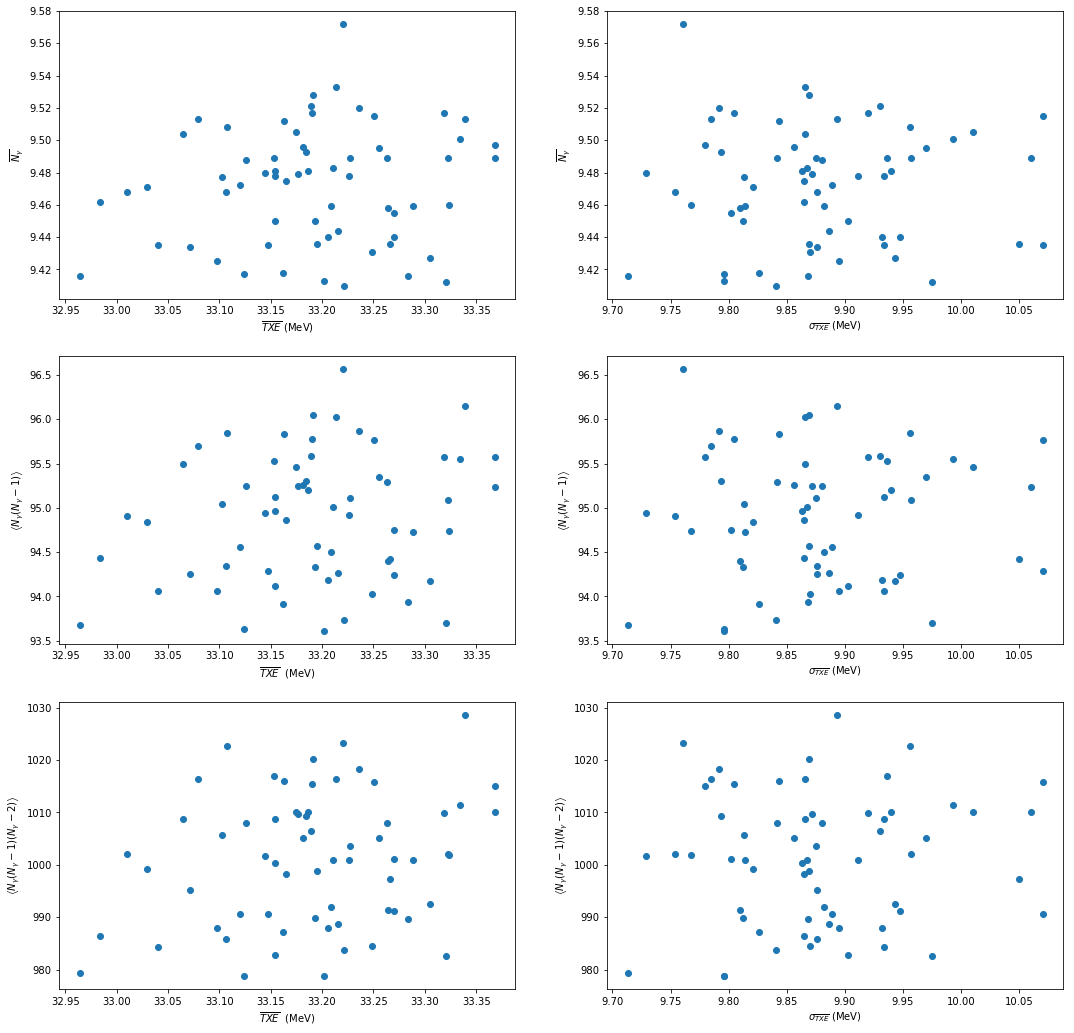

In [34]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,2,1,xlabel=r"$\overline{TXE}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TXE, ng, 'o')

plt.subplot(3,2,2,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\overline{N_{\gamma}}$') 
plt.plot(TXEu, ng, 'o')

plt.subplot(3,2,3,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TXE, ngm2, 'o')

plt.subplot(3,2,4,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(TXEu, ngm2, 'o')

plt.subplot(3,2,5,xlabel=r"$\overline{TXE}$  (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TXE, ngm3, 'o')

plt.subplot(3,2,6,xlabel=r"$\sigma_{\overline{TXE}}$ (MeV)",ylabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(TXEu, ngm3, 'o')

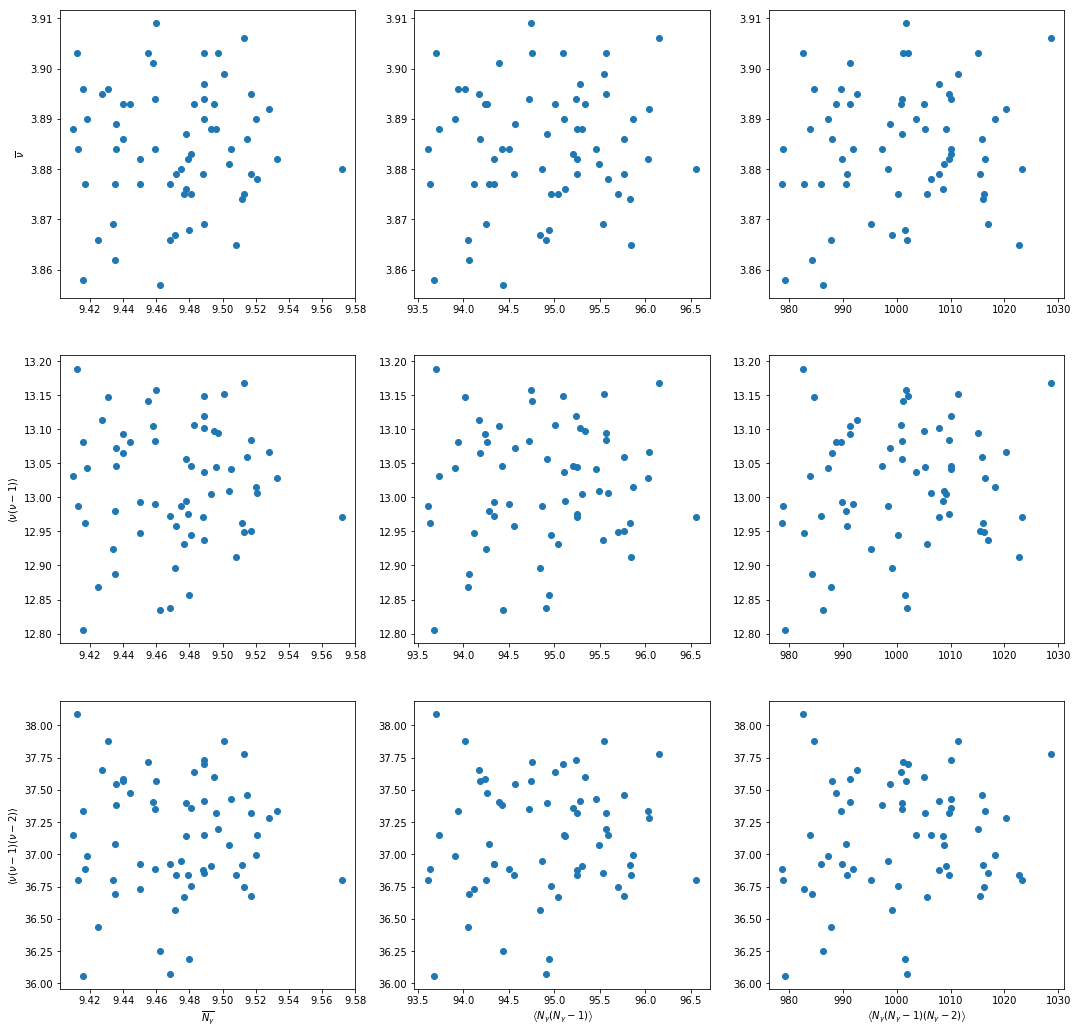

In [35]:
# Plot ng vs tke and moments

fig = plt.figure(figsize=(18,18))

plt.subplot(3,3,1,ylabel=r'$\overline{\nu}$') 
plt.plot(ng, nn, 'o')

plt.subplot(3,3,2) 
plt.plot(ngm2, nn, 'o')

plt.subplot(3,3,3) 
plt.plot(ngm3, nn, 'o')

plt.subplot(3,3,4,ylabel=r'$\left \langle \nu(\nu-1) \right \rangle$') 
plt.plot(ng, nnm2, 'o')

plt.subplot(3,3,5) 
plt.plot(ngm2, nnm2, 'o')

plt.subplot(3,3,6) 
plt.plot(ngm3, nnm2, 'o')

plt.subplot(3,3,7,xlabel=r'$\overline{N_{\gamma}}$',ylabel=r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$') 
plt.plot(ng, nnm3, 'o')

plt.subplot(3,3,8,xlabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$') 
plt.plot(ngm2, nnm3, 'o')

plt.subplot(3,3,9,xlabel=r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$') 
plt.plot(ngm3, nnm3, 'o')